<a href="https://colab.research.google.com/github/Rithikalaksmi/Rithika/blob/main/Movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('IMDb Movies India.csv',encoding='ISO-8859-1')

In [ ]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.describe()
att=df.columns
print(att)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [ ]:
df.isnull().sum()


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
df.shape

(15509, 10)

In [ ]:
unique_gen=df['Genre'].unique()
unique_gen

array(['Drama', 'Drama, Musical', 'Comedy, Romance',
       'Comedy, Drama, Musical', 'Drama, Romance, War', 'Documentary',
       'Horror, Mystery, Thriller', 'Action, Crime, Thriller', 'Horror',
       'Horror, Romance, Thriller', 'Comedy, Drama, Romance', 'Thriller',
       'Comedy, Drama', nan, 'Comedy, Drama, Fantasy',
       'Comedy, Drama, Family', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Biography', 'Comedy, Horror', 'Action',
       'Drama, Horror, Mystery', 'Comedy', 'Action, Thriller',
       'Drama, History', 'Drama, History, Sport',
       'Horror, Mystery, Romance', 'Horror, Mystery',
       'Drama, Horror, Romance', 'Action, Drama, History',
       'Action, Drama, War', 'Comedy, Family',
       'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'War', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Drama, Romance', 'Adventure, Drama', 'Comedy, Mystery, Thriller',
       'Action, Crime, Dr

In [ ]:
rating_dist=df['Rating'].value_counts()
rating_dist

6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: Rating, Length: 84, dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
att=['Name','Year','Duration','Votes','Rating']
df.dropna(subset=att,inplace=True)
miss_val=df.isna().sum()
print(miss_val)

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64


In [ ]:
df
movie=df[['Name','Rating']]
movie.head()

,Name,Rating
1,#Gadhvi (He thought he was Gandhi),7.0
3,#Yaaram,4.4
5,...Aur Pyaar Ho Gaya,4.7
6,...Yahaan,7.4
8,?: A Question Mark,5.6


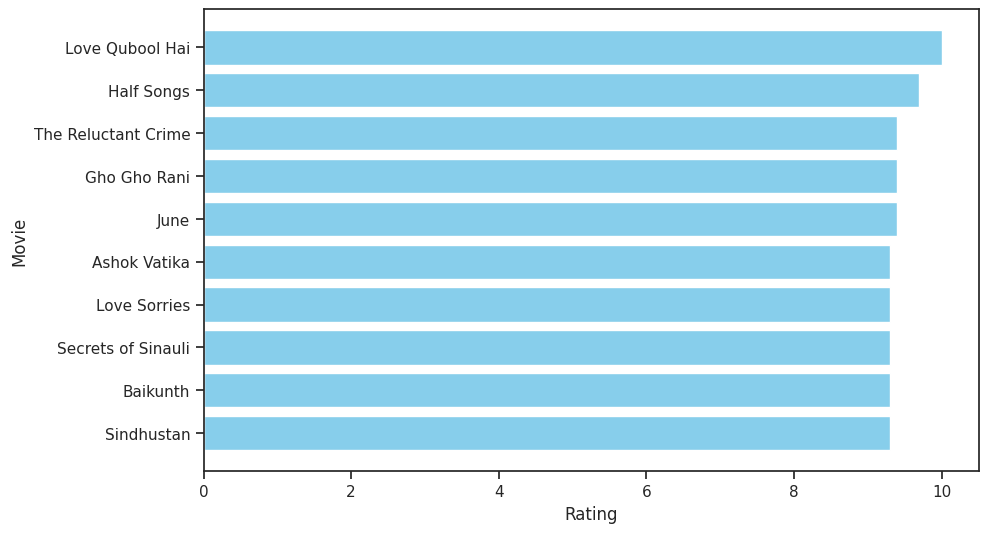

In [ ]:
top=df.sort_values(by='Rating',ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(top['Name'],top['Rating'],color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.gca().invert_yaxis()
plt.show()

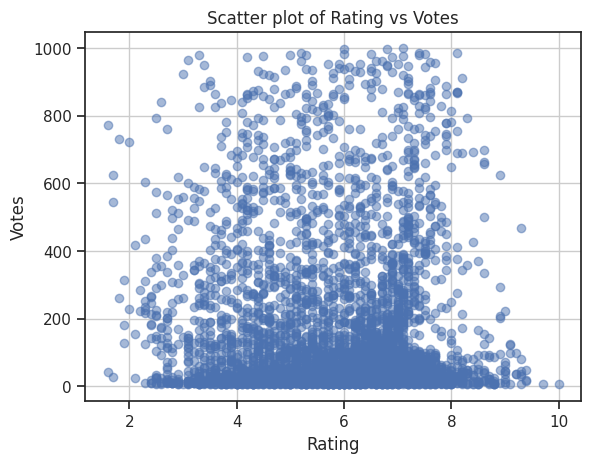

In [ ]:
df['Votes']=pd.to_numeric(df['Votes'],errors='coerce')
plt.scatter(df['Rating'],df['Votes'],alpha=0.5,color='b')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Scatter plot of Rating vs Votes')
plt.grid(True)
plt.show()


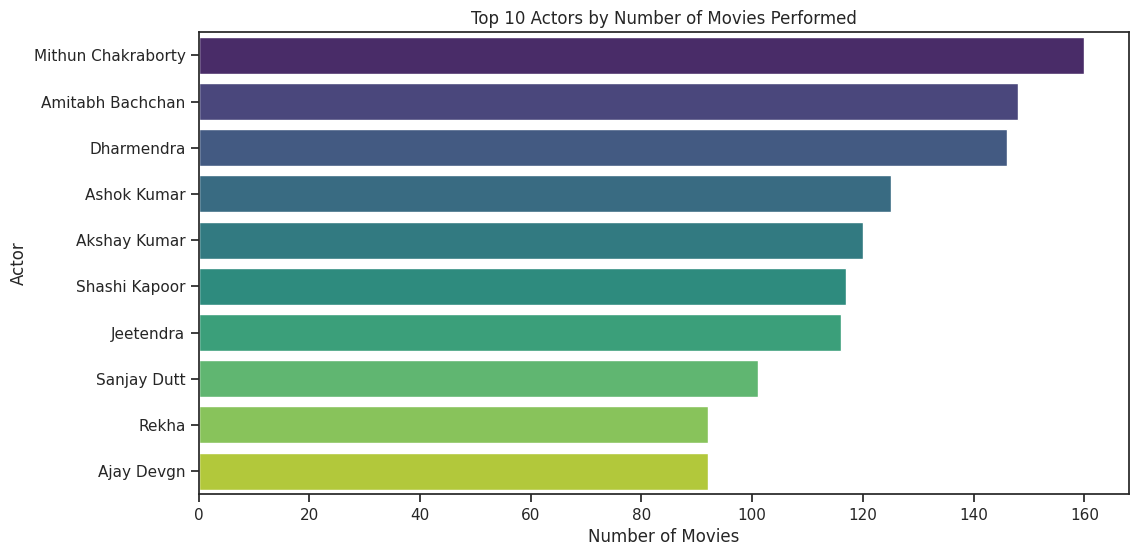

In [ ]:
actors=pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']])
actor_counts= actors.value_counts().reset_index()
actor_counts.columns=['Actor', 'Number of Movies']
plt.figure(figsize = (12, 6))
sns.barplot(x= 'Number of Movies', y ='Actor', data = actor_counts.head(10), palette = 'viridis')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.title('Top 10 Actors by Number of Movies Performed')
plt.show()

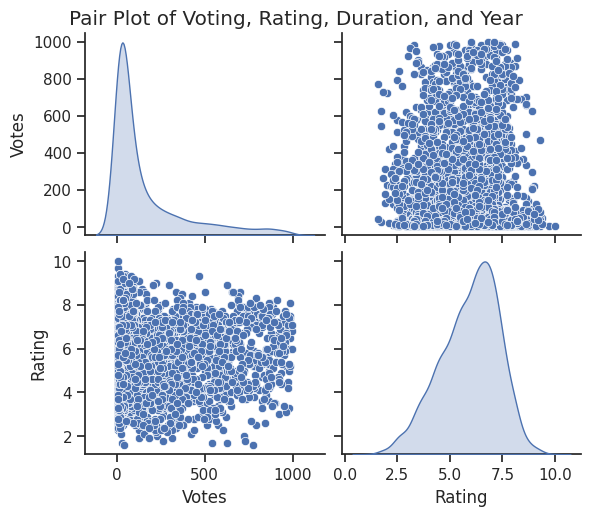

In [ ]:
columns_of_interest = ['Votes', 'Rating', 'Duration', 'Year']
sns.set(style ='ticks')
sns.pairplot(df[columns_of_interest], diag_kind ='kde', markers= 'o', palette ='viridis', height= 2.5, aspect = 1.2)
plt.suptitle('Pair Plot of Voting, Rating, Duration, and Year', y =1.02)
plt.show()

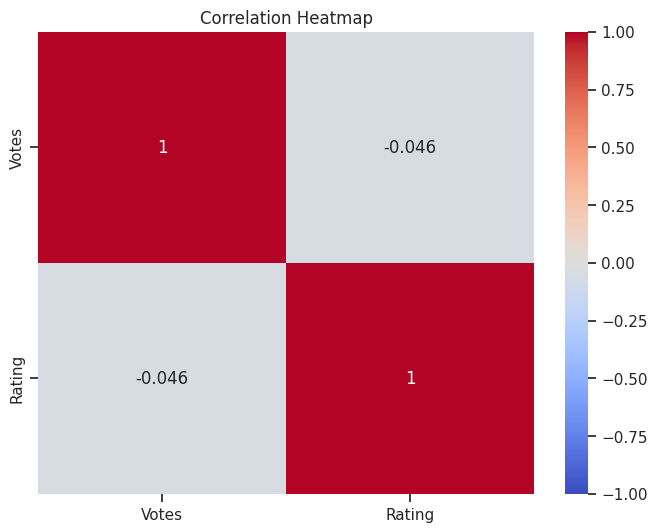

In [ ]:
numerical_columns=['Votes', 'Rating', 'Duration', 'Year']
correlation_matrix =df[numerical_columns].corr()
plt.figure(figsize = (8, 6))
sns.heatmap(correlation_matrix, annot= True, cmap ='coolwarm', vmin=-1, vmax = 1)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
dataset_sorted= df.sort_values(by='Votes', ascending = False)
dataset_sorted['Vote_Count_Percentile'] = dataset_sorted['Votes'].rank(pct = True)*100
dataset_sorted.reset_index(drop = True, inplace = True)
print(dataset_sorted[['Name', 'Votes', 'Vote_Count_Percentile']])

                                      Name  Votes  Vote_Count_Percentile
0     Satyam Shivam Sundaram: Love Sublime  999.0             100.000000
1                               Hera Pheri  998.0              99.977689
2                              Kurukshetra  996.0              99.955377
3                              Dishkiyaoon  986.0              99.933066
4                               Kadvi Hawa  985.0              99.899598
...                                    ...    ...                    ...
5846                                 Ziddi    NaN                    NaN
5847                        Zila Ghaziabad    NaN                    NaN
5848                                 Zinda    NaN                    NaN
5849              Zindagi Na Milegi Dobara    NaN                    NaN
5850                              Zubeidaa    NaN                    NaN

[5851 rows x 3 columns]


In [ ]:
df.head()
df=df.dropna(subset=['Votes'])
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [ ]:
df['Year'] = df['Year'].astype(str)
df['Duration'] = df['Duration'].astype(str)
df['Year'] = df['Year'].str.extract('(\d+)').astype(float)
df['Duration'] = df['Duration'].str.extract('(\d+)').astype (float)
X = df[['Year', 'Duration', 'Votes']]
y = df['Rating']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R2) Score: {r2}")


Mean Absolute Error: 1.084831138760136
Root Mean Squared Error: 1.3484226346477919
R-squared (R2) Score: 0.098121638402908


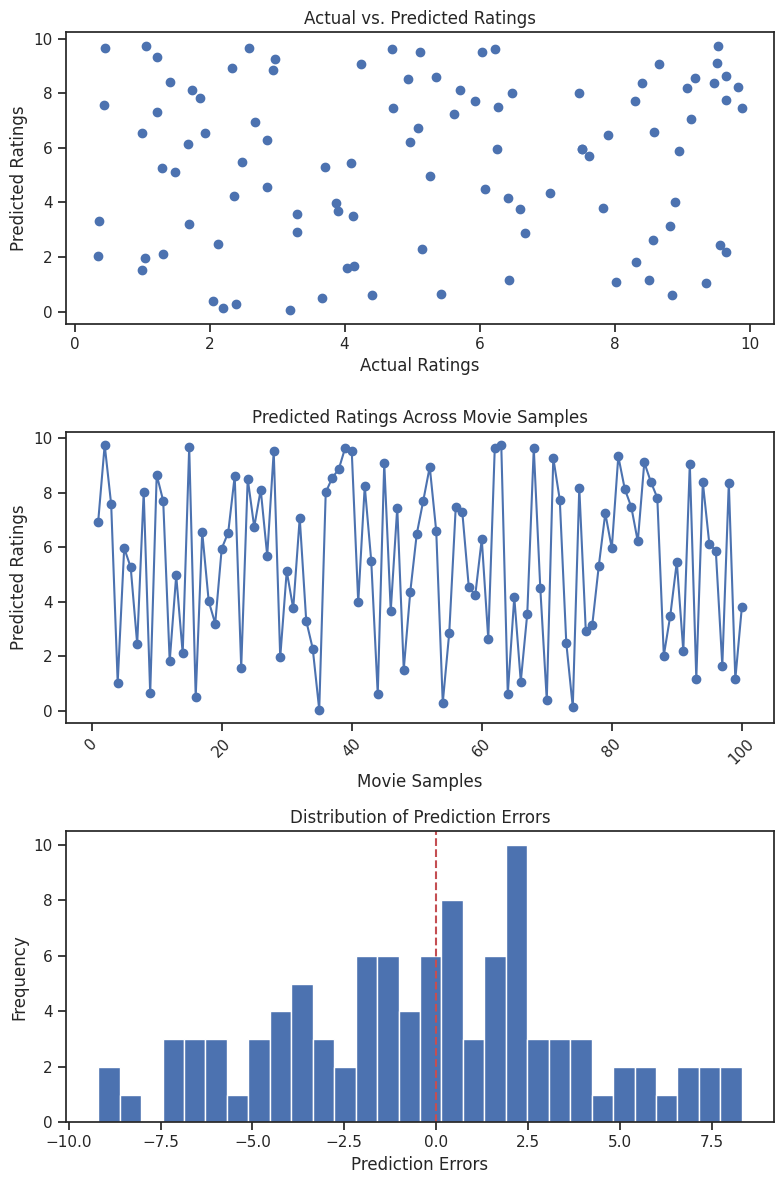

In [ ]:
y_test = np.random.rand(100)* 10
y_pred =np.random.rand(100)*10
errors = y_test-y_pred
fig, axs = plt.subplots(3, 1, figsize = (8, 12))
axs[0].scatter(y_test, y_pred)
axs[0].set_xlabel("Actual Ratings")
axs[0].set_ylabel("Predicted Ratings")
axs[0].set_title("Actual vs. Predicted Ratings")
# Line plot
movie_samples = np.arange(1, len(y_pred) + 1)
axs[1].plot(movie_samples, y_pred, marker = 'o', linestyle = '-')
axs[1].set_xlabel("Movie Samples")
axs[1].set_ylabel("Predicted Ratings")
axs[1].set_title("Predicted Ratings Across Movie Samples")
axs[1].tick_params(axis = 'x', rotation = 45)
# Histogram
axs[2].hist(errors, bins=30)
axs[2].set_xlabel("Prediction Errors")
axs[2].set_ylabel("Frequency")
axs[2].set_title("Distribution of Prediction Errors")
axs[2].axvline(x = 0, color = 'r', linestyle = '--')
plt.tight_layout()
plt.show()